In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('VCB.csv')
df=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 77ms/step - loss: 0.0524 - val_loss: 0.0105
Epoch 2/100
11/11 [==============================] - 0s 34ms/step - loss: 0.0048 - val_loss: 0.0254
Epoch 3/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 4/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 5/100
11/11 [==============================] - 0s 34ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 6/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 7/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 8/100
11/11 [==============================] - 0s 32ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 9/100
11/11 [==============================] - 0s 33ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 10/100
11/11 [==============================] - 0s 34ms/step - loss: 0.0011 - val_loss: 0.0028

Epoch 79/100
11/11 [==============================] - 0s 35ms/step - loss: 4.4621e-04 - val_loss: 7.7983e-04
Epoch 80/100
11/11 [==============================] - 0s 33ms/step - loss: 5.0635e-04 - val_loss: 9.9664e-04
Epoch 81/100
11/11 [==============================] - 0s 33ms/step - loss: 5.7249e-04 - val_loss: 0.0013
Epoch 82/100
11/11 [==============================] - 0s 34ms/step - loss: 4.8406e-04 - val_loss: 8.7913e-04
Epoch 83/100
11/11 [==============================] - 0s 34ms/step - loss: 4.3762e-04 - val_loss: 8.5959e-04
Epoch 84/100
11/11 [==============================] - 0s 36ms/step - loss: 4.6177e-04 - val_loss: 8.5480e-04
Epoch 85/100
11/11 [==============================] - 0s 34ms/step - loss: 4.3321e-04 - val_loss: 7.7648e-04
Epoch 86/100
11/11 [==============================] - 0s 34ms/step - loss: 4.7420e-04 - val_loss: 7.6130e-04
Epoch 87/100
11/11 [==============================] - 0s 34ms/step - loss: 4.4258e-04 - val_loss: 7.9636e-04
Epoch 88/100
11/11 [===

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 40ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.6 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 6878.055581910667
Testing RMSE: 7275.395432077352
Validation MAPE: 6.263056565656723
Testing MAPE: 7.327593676590377
Validation MAE: 5132.4121484375
Testing MAE: 5716.606750684442


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[len(val_data)-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):

    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.69745195 0.70794495 0.70444728 0.70094962 0.70444728 0.72018678
 0.7324286  0.72018678 0.76565642 0.76915409 0.79014008 0.79014008
 0.84085623 0.84785156 0.80937724 0.80413074 0.82161907 0.84785156
 0.88457704 0.89507004 0.94753502 0.94753502 0.89332121 0.92829786
 0.87933055 0.90556304 0.94753502 1.         0.93004669 0.96852101
 0.94753502 0.97376751 0.95627918 0.93879086 0.94753502 0.93704202
 0.94753502 0.96152568 0.96852101 0.94753502 0.95278152 0.95627918
 0.94403736 0.95627918 0.94753502 0.95103269 0.91080953 0.91255837
 0.92829786 0.93354436 0.94753502 0.93179553 0.92130253 0.91255837
 0.9195537  0.91255837 0.87758171 0.80937724 0.8338609  0.87758171
 0.90731187 0.87758171 0.91255837 0.92654903 0.93529319 0.94228852
 0.9195537  0.94403736 0.93004669 0.93179553 0.91605603 0.89507004
 0.87758171 0.86359105 0.86533989 0.86359105 0.86708872 0.86708872
 0.86009339 0.86883755 0.86533989 0.85134922 0.85834456 0.86533989
 0.88457704 0.89507004 0.9038142  0.86883755 0.891

8 day output [[0.9213463]]
9 day input [0.76915409 0.79014008 0.79014008 0.84085623 0.84785156 0.80937724
 0.80413074 0.82161907 0.84785156 0.88457704 0.89507004 0.94753502
 0.94753502 0.89332121 0.92829786 0.87933055 0.90556304 0.94753502
 1.         0.93004669 0.96852101 0.94753502 0.97376751 0.95627918
 0.93879086 0.94753502 0.93704202 0.94753502 0.96152568 0.96852101
 0.94753502 0.95278152 0.95627918 0.94403736 0.95627918 0.94753502
 0.95103269 0.91080953 0.91255837 0.92829786 0.93354436 0.94753502
 0.93179553 0.92130253 0.91255837 0.9195537  0.91255837 0.87758171
 0.80937724 0.8338609  0.87758171 0.90731187 0.87758171 0.91255837
 0.92654903 0.93529319 0.94228852 0.9195537  0.94403736 0.93004669
 0.93179553 0.91605603 0.89507004 0.87758171 0.86359105 0.86533989
 0.86359105 0.86708872 0.86708872 0.86009339 0.86883755 0.86533989
 0.85134922 0.85834456 0.86533989 0.88457704 0.89507004 0.9038142
 0.86883755 0.89157238 0.94753502 0.93529319 0.93004669 0.91255837
 0.94403736 0.9248002  0

16 day output [[0.9112786]]
17 day input [0.84785156 0.88457704 0.89507004 0.94753502 0.94753502 0.89332121
 0.92829786 0.87933055 0.90556304 0.94753502 1.         0.93004669
 0.96852101 0.94753502 0.97376751 0.95627918 0.93879086 0.94753502
 0.93704202 0.94753502 0.96152568 0.96852101 0.94753502 0.95278152
 0.95627918 0.94403736 0.95627918 0.94753502 0.95103269 0.91080953
 0.91255837 0.92829786 0.93354436 0.94753502 0.93179553 0.92130253
 0.91255837 0.9195537  0.91255837 0.87758171 0.80937724 0.8338609
 0.87758171 0.90731187 0.87758171 0.91255837 0.92654903 0.93529319
 0.94228852 0.9195537  0.94403736 0.93004669 0.93179553 0.91605603
 0.89507004 0.87758171 0.86359105 0.86533989 0.86359105 0.86708872
 0.86708872 0.86009339 0.86883755 0.86533989 0.85134922 0.85834456
 0.86533989 0.88457704 0.89507004 0.9038142  0.86883755 0.89157238
 0.94753502 0.93529319 0.93004669 0.91255837 0.94403736 0.9248002
 0.94053969 0.94403736 0.98251167 0.96852101 0.95694411 0.9531489
 0.94101781 0.94167292 0

24 day output [[0.9059952]]
25 day input [0.90556304 0.94753502 1.         0.93004669 0.96852101 0.94753502
 0.97376751 0.95627918 0.93879086 0.94753502 0.93704202 0.94753502
 0.96152568 0.96852101 0.94753502 0.95278152 0.95627918 0.94403736
 0.95627918 0.94753502 0.95103269 0.91080953 0.91255837 0.92829786
 0.93354436 0.94753502 0.93179553 0.92130253 0.91255837 0.9195537
 0.91255837 0.87758171 0.80937724 0.8338609  0.87758171 0.90731187
 0.87758171 0.91255837 0.92654903 0.93529319 0.94228852 0.9195537
 0.94403736 0.93004669 0.93179553 0.91605603 0.89507004 0.87758171
 0.86359105 0.86533989 0.86359105 0.86708872 0.86708872 0.86009339
 0.86883755 0.86533989 0.85134922 0.85834456 0.86533989 0.88457704
 0.89507004 0.9038142  0.86883755 0.89157238 0.94753502 0.93529319
 0.93004669 0.91255837 0.94403736 0.9248002  0.94053969 0.94403736
 0.98251167 0.96852101 0.95694411 0.9531489  0.94101781 0.94167292
 0.93625563 0.93481308 0.92747426 0.92542791 0.92134631 0.92151308
 0.92070442 0.91763955 

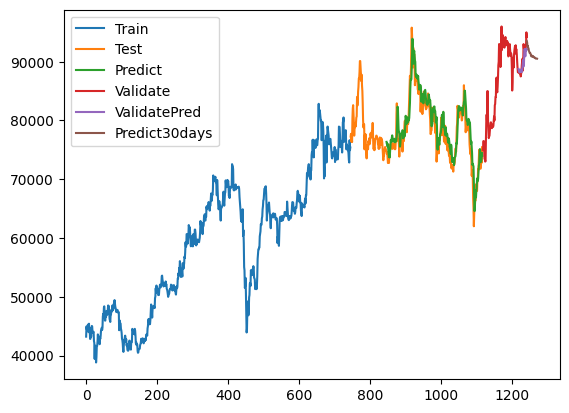

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()